<a href="https://colab.research.google.com/github/vyolete/SystemRecomendations/blob/main/KmeansBookRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [31]:
pip install plotly


In [150]:
%matplotlib inline
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [160]:
# este codigo Solo en Colab
try:
    import google.colab
    !pip install -q gdown
except:
    pass

In [184]:
# Descargar archivos CSV desde Google Drive
id_DataSetFinal = '1_cfAOfeYQ9qikaXPavccG1SnQfWsg-fg'


gdown.download(f'https://drive.google.com/uc?id={id_DataSetFinal}', 'data.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1_cfAOfeYQ9qikaXPavccG1SnQfWsg-fg
To: /content/data.csv
100%|██████████| 7.61M/7.61M [00:00<00:00, 176MB/s]


'data.csv'

In [162]:
# Cargar data para IOS

# Changed error_bad_lines to on_bad_lines
data=pd.read_csv('/content/data.csv', sep=',', on_bad_lines='skip')
data=pd.DataFrame(data)
# Convertir columnas de dataframe en listas
data.columns.tolist()
data.index.tolist()

print (type(data.columns.tolist()))
print (type(data.index.tolist()))

print ('Data read into a pandas dataframe!')
data.shape

<class 'list'>
<class 'list'>
Data read into a pandas dataframe!


(133180, 11)

In [134]:
#Ver los datos
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
0,276774,3535,6.102771,15827,27899,1995,6299,28,261,81,79
1,276774,62322,6.500000,25125,23956,2002,3642,28,261,81,79
2,276774,62656,6.102771,14242,9475,1989,1700,28,261,81,79
3,276774,63235,9.000000,17291,1011,1992,2424,28,261,81,79
4,276774,64998,10.000000,16105,10256,2000,4680,28,261,81,79


In [41]:
#Ver columnas del data frame
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Age', 'City', 'State', 'Country'],
      dtype='object')

In [181]:
#Descripcion de los datos
data.describe()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
count,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000
mean,140201.751089,33559.415520,7.266939,33874.073464,16389.325634,1995.356217,3417.549737,34.829929,1518.125379,376.879734,41.151397
std,78413.834215,20485.673385,1.497903,19477.659186,9468.471745,7.478535,1989.058220,11.466215,814.025502,210.443365,30.079365
min,8.000000,0.000000,1.000000,0.000000,0.000000,1902.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,76626.000000,16608.000000,6.102771,16903.750000,8210.750000,1992.000000,1609.000000,27.000000,783.000000,198.000000,16.000000
50%,141109.000000,31497.000000,7.226804,34308.000000,16217.000000,1997.000000,3542.000000,33.000000,1530.000000,496.000000,30.000000
75%,204591.000000,51012.250000,8.000000,51165.000000,24610.000000,2001.000000,5135.000000,42.000000,2183.000000,496.000000,76.000000
max,278852.000000,71851.000000,10.000000,66869.000000,32549.000000,2050.000000,6700.000000,100.000000,2910.000000,757.000000,91.000000


In [166]:
# Seleccionamos columnas a escalar

columnas_a_escalar = ['Age', 'Book-Rating', 'Year-Of-Publication',
                     'City', 'State', 'Country', 'Publisher']

# Escalado de columnas seleccionadas
escalador = StandardScaler()
df_standar = pd.DataFrame(
    escalador.fit_transform(data_standar[columnas_a_escalar]),
    columns=columnas_a_escalar,
    index=data_standar.index
)



In [155]:
# Realizamos un muestreo de los datos para ejecutar el modelo

data_standar = df_clustering_ready.sample(frac=0.1, random_state=42)  # 10% del dataset

## MiniBatchKMeans

In [167]:
#Solo ejecutar si se va realizar un muestreo
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Inicializar listas para almacenar resultados
inercia = []
silhouette = []
k_range = range(2, 11)

# Usamos tqdm para ver el progreso
for k in tqdm(k_range, desc="Calculando MiniBatchKMeans"):
    mbkmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000, n_init=10)
    mbkmeans.fit(data_standar)
    inercia.append(mbkmeans.inertia_)
    silhouette.append(silhouette_score(data_standar, mbkmeans.labels_))



Calculando MiniBatchKMeans:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
#Solo ejecutar si se va realizar con todos los datos
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Inicializar listas para almacenar resultados
inercia = []
silhouette = []
k_range = range(2, 11)

# Usamos tqdm para ver el progreso
for k in tqdm(k_range, desc="Calculando KMeans"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_standar)
    inercia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_standar, kmeans.labels_))


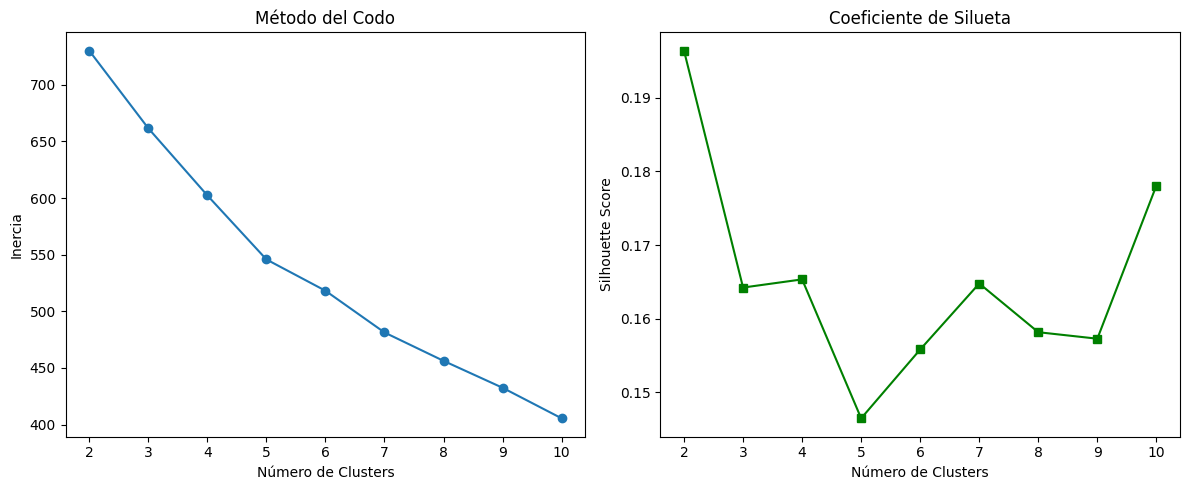

In [168]:
# Gráficas: Método del codo y Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='s', color='green')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


##Entrenar modelo KMeans con k=3

In [139]:
#Solo ejecutar si se esta trabajando con kmeans y todos los datos

from sklearn.cluster import KMeans

# This cell fits the KMeans model and adds the 'Cluster' column to data_standar
from sklearn.cluster import KMeans

# Entrenamos el modelo con 4 clusters
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_final.fit(data_standar)

# Agregamos la columna de cluster al DataFrame original
data_standar['Cluster'] = kmeans_final.labels_

In [175]:
# Entrenamos el modelo con 2 clusters (ajusta el número según lo que necesites)
kmeans_final = MiniBatchKMeans(n_clusters=3, random_state=42, n_init=10, batch_size=1024)
kmeans_final.fit(data_standar)

# Agregamos la columna de cluster al DataFrame original
data_standar['Cluster'] = kmeans_final.labels_


###Visualizar distribución de usuarios por clúster

<ipython-input-176-2408172471>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




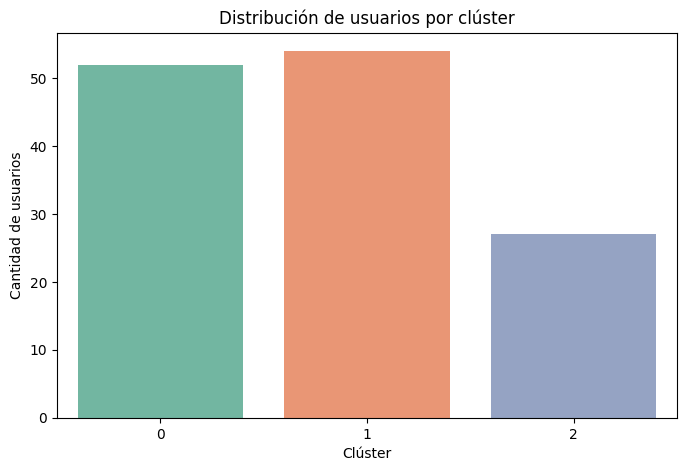

In [176]:
# This cell plots the count of clusters using the updated data_standar DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data_standar, palette='Set2')
plt.title('Distribución de usuarios por clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [177]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 📌 KMeans - Visualización de Clusters

# Nota: El modelo kmeans_final ya fue entrenado anteriormente sobre 'data_standar'.
# Por lo tanto, podemos reutilizar el objeto entrenado y sus etiquetas (labels).
# Si deseas volver a entrenar KMeans, asegúrate de hacerlo sobre 'data_standar'.

# Usamos las etiquetas del modelo previamente entrenado
labels = kmeans_final.labels_

# Creamos un DataFrame para graficar los clusters
# Seleccionamos solo las columnas utilizadas para el clustering y renombramos para visualización
df_plot = data_standar[['Age', 'Book-Rating', 'Year-Of-Publication']].copy()
df_plot.columns = ['Edad', 'Puntaje', 'Año']  # Renombramos para claridad en los ejes del gráfico
df_plot['Cluster'] = labels.astype(str)  # Convertimos a string para colorear por categoría

# 📊 Gráfico 3D interactivo con Plotly
import plotly.express as px

fig = px.scatter_3d(
    df_plot,
    x='Edad', y='Puntaje', z='Año',
    color='Cluster',
    title='Clusters de libros según Edad, Puntaje y Año',
    opacity=0.6
)

# Configuramos el tamaño de los puntos
fig.update_traces(marker=dict(size=5))

# Mostramos el gráfico interactivo
fig.show()



# 🧠 Análisis: Promedio de variables numéricas por cluster
# Agrupamos por clúster y calculamos la media para entender el perfil de cada grupo
print(data_standar.groupby('Cluster')[['Age', 'Book-Rating', 'Year-Of-Publication']].mean(numeric_only=True))


              Age  Book-Rating  Year-Of-Publication
Cluster                                            
0        0.054359     0.010677             0.051408
1       -0.047479     0.167715            -0.200583
2        0.267305    -0.106313             0.452083


In [ ]:
# Guardar como HTML interactivo
fig.write_html("Kmeans.html")

In [180]:


# Dataset con etiquetas de clúster
df_clusters = data_standar.copy()  # Asegúrate que esté escalado
df_clusters['cluster'] = kmeans_final.labels_

# Centroides
centroids = kmeans.cluster_centers_

# Crear figura
fig = go.Figure()

# Añadir los puntos de cada clúster
for cluster_id in range(kmeans.n_clusters):
    cluster_data = df_clusters[df_clusters['cluster'] == cluster_id]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Book-Rating'],
        y=cluster_data['Age'],
        z=cluster_data['Year-Of-Publication'],
        mode='markers',
        name=f'Cluster {cluster_id}',
        marker=dict(size=3),
        opacity=0.6
    ))

# Añadir centroides
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers+text',
    name='Centroides',
    marker=dict(size=10, color='black', symbol='diamond'),
    text=[f'C{i}' for i in range(kmeans.n_clusters)],
    textposition='top center'
))

# Layout bonito
fig.update_layout(
    title='Clusters con KMeans + Centroides',
    scene=dict(
        xaxis_title='Book-Rating',
        yaxis_title='Age',
        zaxis_title='Year-Of-Publication'
    )
)

fig.show()

# 🧠 Análisis: Promedio de variables numéricas por cluster
# Agrupamos por clúster y calculamos la media para entender el perfil de cada grupo
print(data_standar.groupby('Cluster')[['Age', 'Book-Rating', 'Year-Of-Publication']].mean(numeric_only=True))

              Age  Book-Rating  Year-Of-Publication
Cluster                                            
0        0.054359     0.010677             0.051408
1       -0.047479     0.167715            -0.200583
2        0.267305    -0.106313             0.452083


In [183]:
data_standar.describe()

,Age,Book-Rating,Year-Of-Publication,City,State,Country,Publisher,cluster,Cluster
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.056241,0.050687,0.030436,-0.043726,0.088783,-0.028549,-0.025241,4.496241,0.812030
std,1.008857,0.923466,0.892076,1.070011,1.029275,1.020553,1.049026,3.163772,0.750256
min,-1.854211,-2.138051,-2.956844,-1.882857,-1.749042,-1.208817,-1.635372,0.000000,0.000000
25%,-0.703280,-0.773899,-0.381321,-1.060770,-0.859708,-0.838591,-0.947971,1.000000,0.000000
50%,-0.083548,-0.090916,0.296448,0.029175,0.588496,-0.838591,-0.075231,5.000000,1.000000
75%,0.801783,0.521783,0.703109,1.084558,0.588496,1.180820,0.820489,7.000000,1.000000
max,2.483913,1.754389,1.380878,1.644960,1.856891,1.551045,1.649267,9.000000,2.000000
